# Combine Numeric and Categorical Features

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def read_df(filename, valtype):
    df = pd.read_csv(filename, low_memory=False, dtype=valtype)
    return df

In [4]:
from collections import OrderedDict, defaultdict

def create_combined_df(input_dict):
    fdf = pd.DataFrame()
    cols = OrderedDict()
    for k, v in input_dict.items():
        df = read_df('./data/'+k, v)
        colnames = [c for c in df.columns if c not in ['None', 'Unnamed: 0']]
        cols[k] = colnames
        fdf = pd.concat([fdf, df], axis=1)
    
    # fdf = fdf.DataFrame(fdf, columns=cols)
    fdf = fdf.drop(['None', 'Unnamed: 0'], axis=1)
    return fdf, cols

# Read all data

In [68]:
y_train = pd.read_csv('./data/numeric_train_indeps.csv', encoding='utf8')
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_train.sample()

,review_scores_rating
68287,100.0


In [69]:
y_test = pd.read_csv('./data/numeric_train_indeps.csv', encoding='utf8')
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_test.sample()

,review_scores_rating
30289,100.0


In [37]:
num_train = pd.read_csv('./data/fin_num_train_deps.csv')
num_train = num_train.drop(['Unnamed: 0'], axis=1)
num_test = pd.read_csv('./data/fin_num_test_deps.csv')
num_test = num_test.drop(['Unnamed: 0'], axis=1)

cat_train = pd.read_csv('./data/fin_cat_train_deps.csv')
cat_train = cat_train.drop(['Unnamed: 0'], axis=1)
cat_test = pd.read_csv('./data/fin_cat_test_deps.csv')
cat_test = cat_test.drop(['Unnamed: 0'], axis=1)

amen_train = pd.read_csv('./data/fin_amen_train_deps.csv')
amen_train = amen_train.drop(['Unnamed: 0'], axis=1)
amen_test = pd.read_csv('./data/fin_amen_test_deps.csv')
amen_test = amen_test.drop(['Unnamed: 0'], axis=1)

In [38]:
comb_train = pd.read_csv('./data/fin_comb_train_deps.csv')
comb_train = comb_train.drop(['Unnamed: 0'], axis=1)
comb_test = pd.read_csv('./data/fin_comb_test_deps.csv')
comb_test = comb_test.drop(['Unnamed: 0'], axis=1)

In [10]:
def run_prediction(X, y, Xt, yt, model):
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    if len(yt.shape) == 1:
        yt = yt.reshape(-1, 1)
    
    res = {'train': {}, 'test': {}}
    
    model.fit(X, y)
    
    train_pred = model.predict(X)
    res['train']['pred'] = train_pred
    
    test_pred = model.predict(Xt)
    res['test']['pred'] = test_pred
    
    
    for name, tup in zip(['train', 'test'], [(y, train_pred), (yt, test_pred)]):
        act, prd = tup[0].ravel(), tup[1].ravel()
        print 'Results for %s' % name
        
        mserr = mean_squared_error(act, prd)
        res[name]['mse'] = mserr
        print '%s Mean Squared Error: %.4f' % (name, mserr)
        
        rsq_score = r2_score(act, prd)
        res[name]['r2'] = rsq_score
        print '%s R-Squared: %.4f' % (name, rsq_score)
        
        plt.scatter(act, prd, alpha=0.5)
        plt.title(name+': predictions vs. actual')
        plt.show()
        plt.scatter(act, act-prd, alpha=0.5)
        plt.title(name+': residuals vs. actual')
        plt.show()
        plt.hist(act-prd, alpha=0.5)
        plt.title(name+': residuals histogram')
        plt.show()
    
    return res

In [97]:
def run_model(X, y, model, case='train'):
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    
    res = {}
    
    if 'train' == case:
        model.fit(X, y)
    
    y_pred = model.predict(X)
    # res['pred'] = y_pred
    

    print 'Results for Training'

    mserr = mean_squared_error(y, y_pred)
    res['mse'] = mserr
    print '%s Mean Squared Error: %.4f' % (case, mserr)

    rsq_score = r2_score(y, y_pred)
    res['r2'] = rsq_score
    print '%s R-Squared: %.4f' % (case, rsq_score)
    
    y = np.array(y).reshape(-1, 1)
    print y.shape
    print y_pred.shape
    y_pred = y_pred.reshape(-1, 1)
    plt.scatter(y, y_pred, alpha=0.5)
    plt.title(case+': predictions vs. actual')
    plt.show()
    plt.scatter(y, y - y_pred, alpha=0.5)
    plt.title(case+': residuals vs. actual')
    plt.show()
    plt.hist(y - y_pred, alpha=0.5)
    plt.title(case+': residuals histogram')
    plt.show()
    
    return model, res

In [102]:
def run_model_resgen(X, y, model, case='train', sample_sizes=[]):
    for ss in sample_sizes:
        print '\n\n###########################################'
        print 'Running %s model for %s samples' % (case, ss)
        np.random.seed(1234)
        rand_idxs = np.random.randint(0, X.shape[0], size=ss)
        X_s = X.iloc[rand_idxs]
        y_s = y.iloc[rand_idxs]
        
        yield run_model(X_s, y_s, model, case)



###########################################
Running train model for 1000 samples
Results for Training
train Mean Squared Error: 56.0423
train R-Squared: 0.0025
(1000, 1)
(1000,)


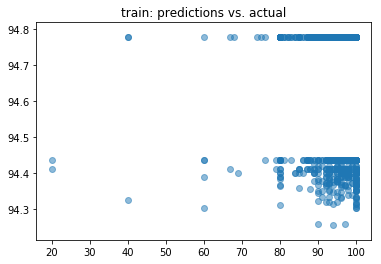

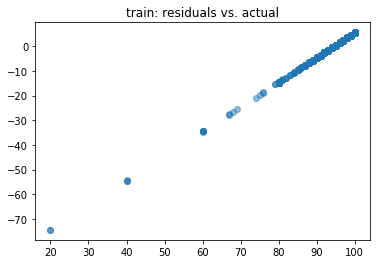

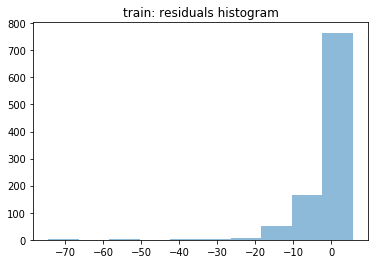

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 56.04234062471086, 'r2': 0.002519057031316718}


###########################################
Running train model for 5000 samples
Results for Training
train Mean Squared Error: 55.1960
train R-Squared: 0.0000
(5000, 1)
(5000,)


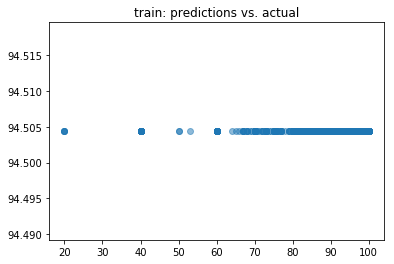

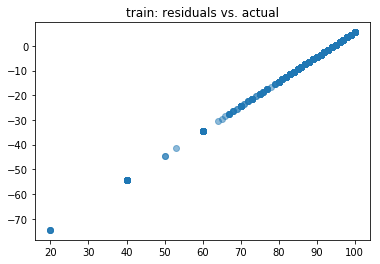

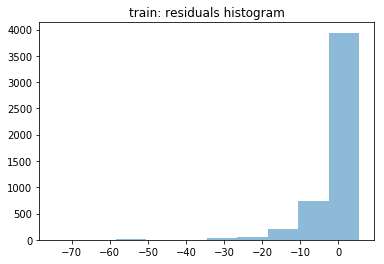

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 55.19598064, 'r2': 0.0}


###########################################
Running train model for 10000 samples
Results for Training
train Mean Squared Error: 54.0770
train R-Squared: 0.0000
(10000, 1)
(10000,)


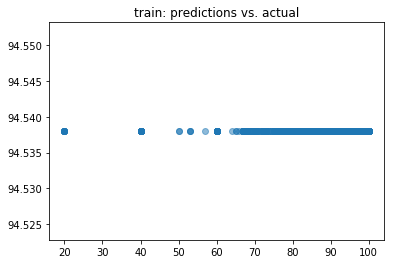

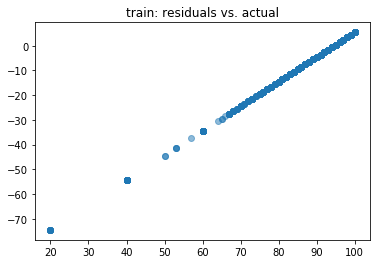

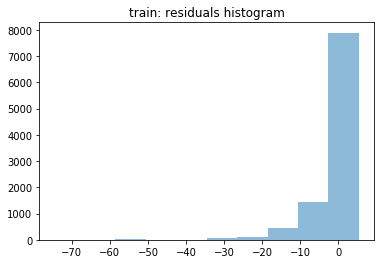

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 54.076956, 'r2': 0.0}


###########################################
Running train model for 20000 samples
Results for Training
train Mean Squared Error: 53.4556
train R-Squared: 0.0000
(20000, 1)
(20000,)


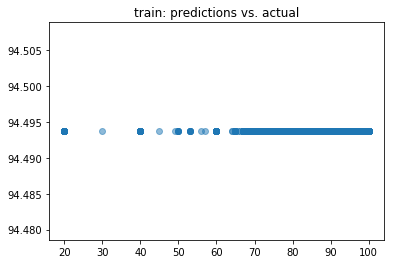

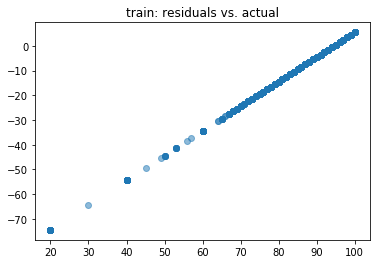

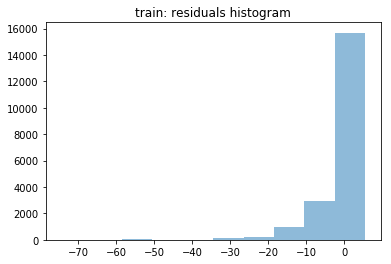

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.4555609375, 'r2': 0.0}


###########################################
Running train model for 50000 samples
Results for Training
train Mean Squared Error: 53.6494
train R-Squared: 0.0000
(50000, 1)
(50000,)


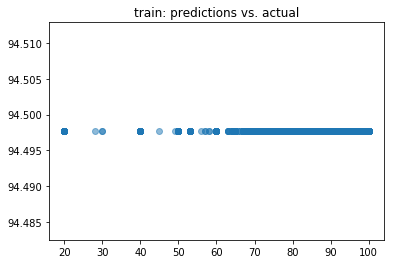

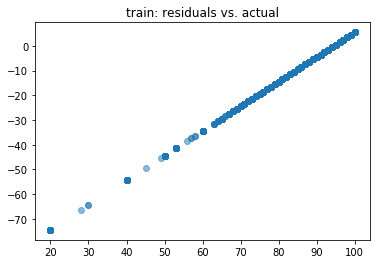

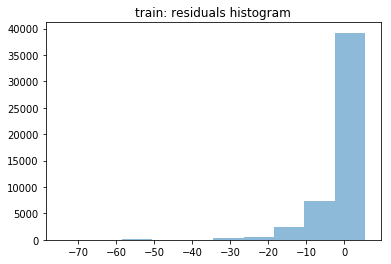

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.64943471, 'r2': 0.0}


In [109]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

sample_sizes = [1000, 5000, 10000, 20000, 50000]

regr = linear_model.Lasso(alpha=0.9, fit_intercept=True, max_iter=10000)

for m, r in run_model_resgen(num_train, y_train, regr, 'train', sample_sizes):
    print m
    print r



###########################################
Running train model for 1000 samples
Results for Training
train Mean Squared Error: 56.1839
train R-Squared: 0.0000
(1000, 1)
(1000,)


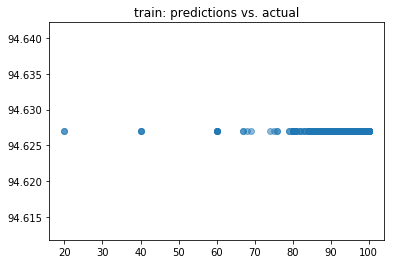

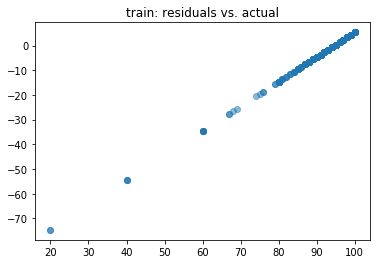

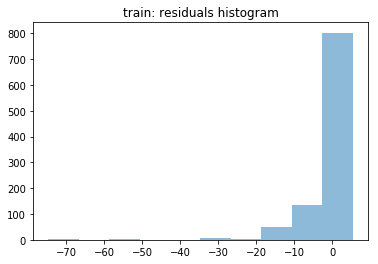

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 56.183870999999996, 'r2': 0.0}


###########################################
Running train model for 5000 samples
Results for Training
train Mean Squared Error: 55.1960
train R-Squared: 0.0000
(5000, 1)
(5000,)


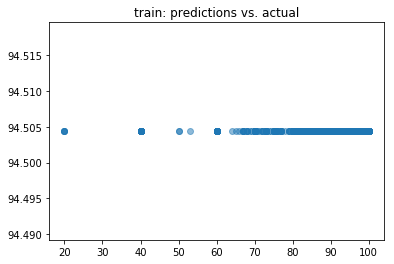

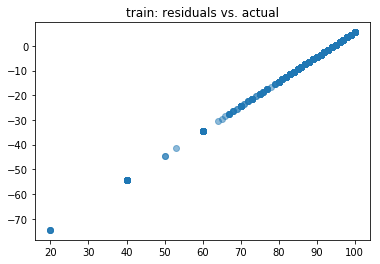

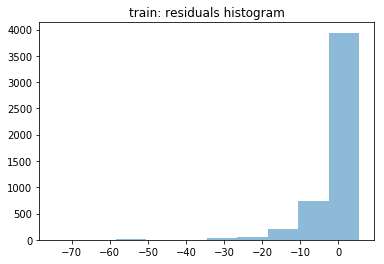

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 55.19598064, 'r2': 0.0}


###########################################
Running train model for 10000 samples
Results for Training
train Mean Squared Error: 54.0770
train R-Squared: 0.0000
(10000, 1)
(10000,)


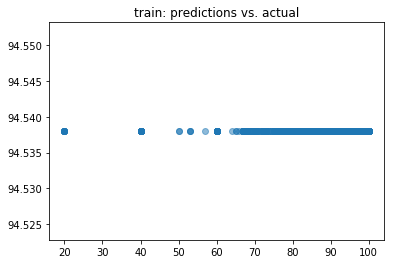

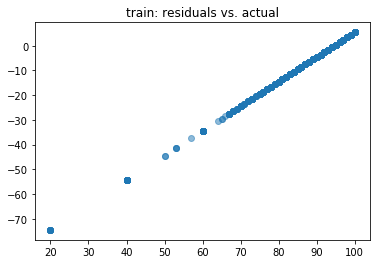

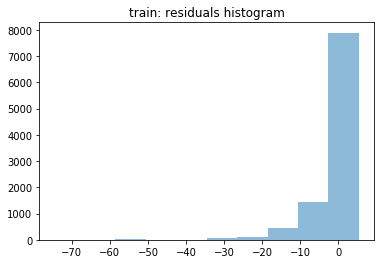

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 54.076956, 'r2': 0.0}


###########################################
Running train model for 20000 samples
Results for Training
train Mean Squared Error: 53.4556
train R-Squared: 0.0000
(20000, 1)
(20000,)


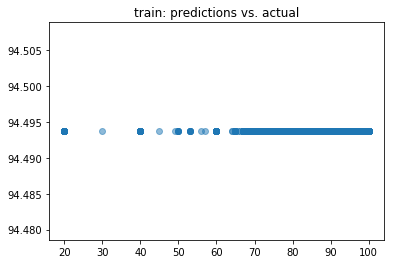

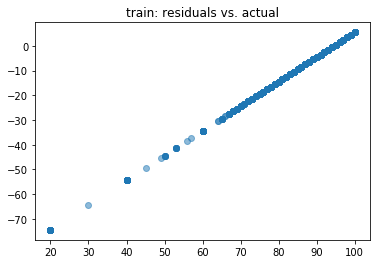

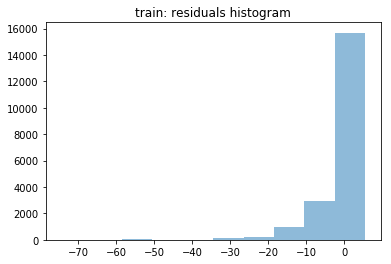

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.4555609375, 'r2': 0.0}


###########################################
Running train model for 50000 samples
Results for Training
train Mean Squared Error: 53.6494
train R-Squared: 0.0000
(50000, 1)
(50000,)


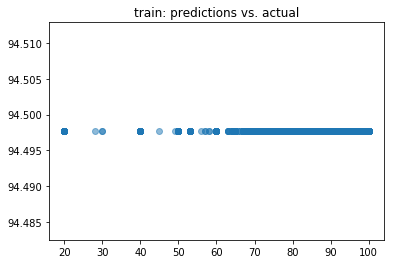

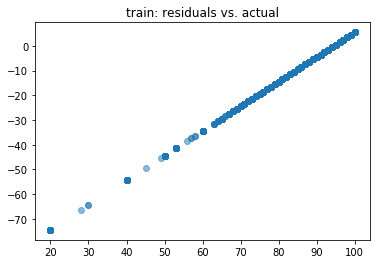

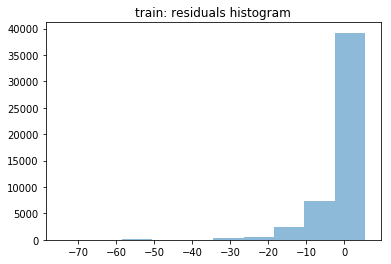

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.64943471, 'r2': 0.0}


In [110]:
for m, r in run_model_resgen(cat_train, y_train, regr, 'train', sample_sizes):
    print m
    print r



###########################################
Running train model for 1000 samples
Results for Training
train Mean Squared Error: 56.1839
train R-Squared: 0.0000
(1000, 1)
(1000,)


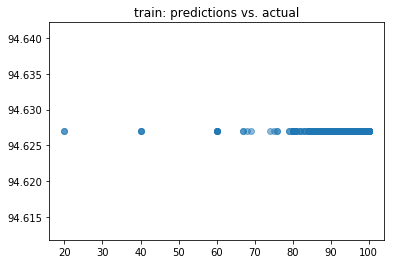

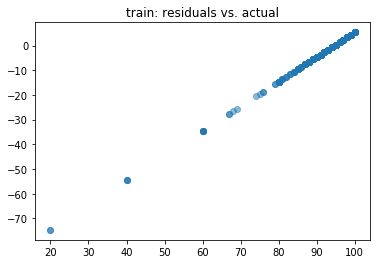

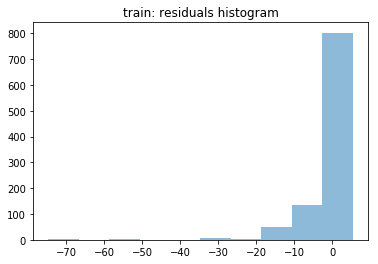

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 56.183870999999996, 'r2': 0.0}


###########################################
Running train model for 5000 samples
Results for Training
train Mean Squared Error: 55.1960
train R-Squared: 0.0000
(5000, 1)
(5000,)


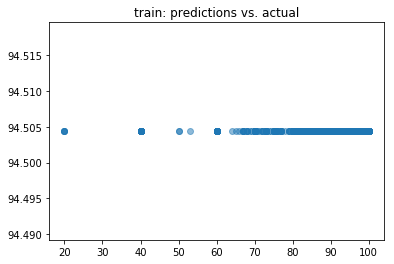

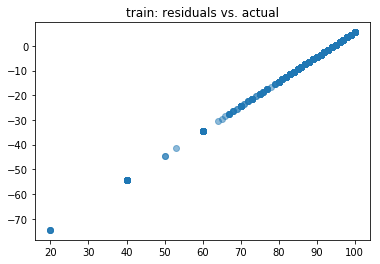

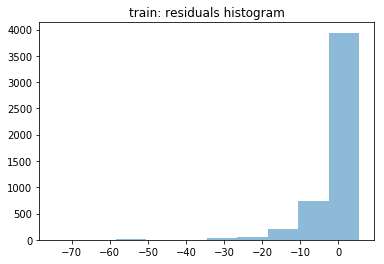

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 55.19598064, 'r2': 0.0}


###########################################
Running train model for 10000 samples
Results for Training
train Mean Squared Error: 54.0770
train R-Squared: 0.0000
(10000, 1)
(10000,)


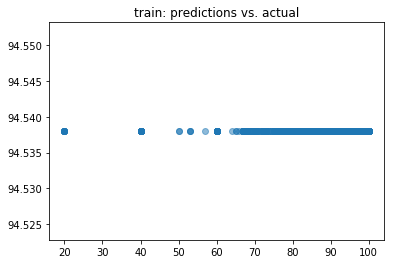

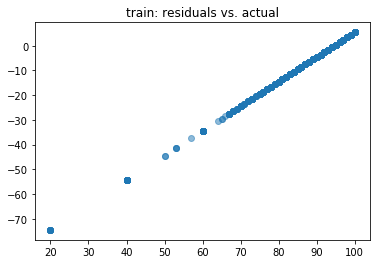

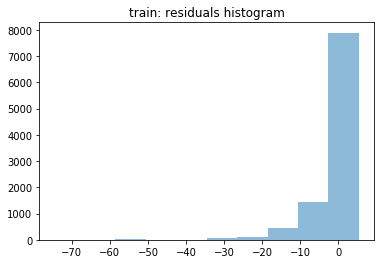

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 54.076956, 'r2': 0.0}


###########################################
Running train model for 20000 samples
Results for Training
train Mean Squared Error: 53.4556
train R-Squared: 0.0000
(20000, 1)
(20000,)


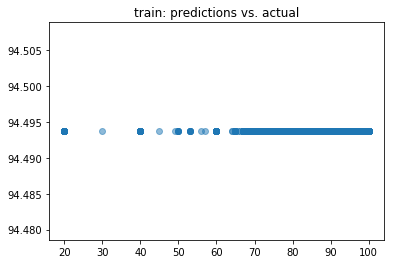

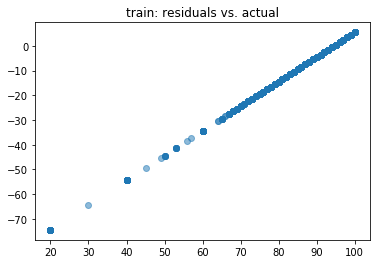

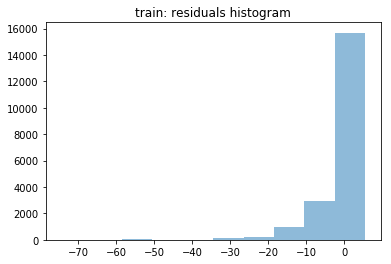

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.4555609375, 'r2': 0.0}


###########################################
Running train model for 50000 samples
Results for Training
train Mean Squared Error: 53.6494
train R-Squared: 0.0000
(50000, 1)
(50000,)


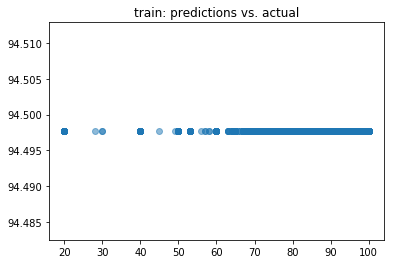

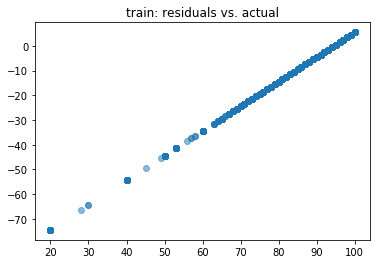

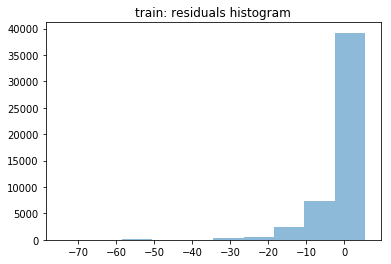

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.64943471, 'r2': 0.0}


In [111]:
for m, r in run_model_resgen(amen_train, y_train, regr, 'train', sample_sizes):
    print m
    print r



###########################################
Running train model for 1000 samples
Results for Training
train Mean Squared Error: 56.0423
train R-Squared: 0.0025
(1000, 1)
(1000,)


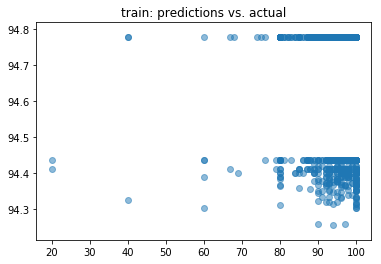

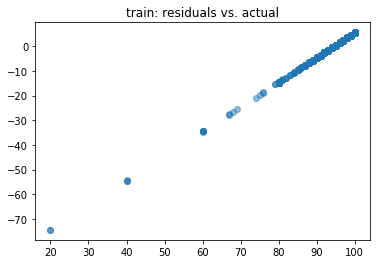

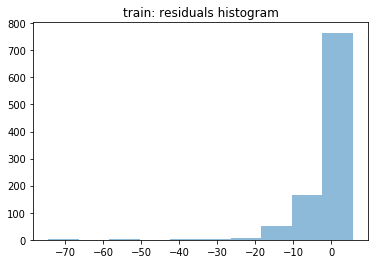

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 56.04234062471086, 'r2': 0.002519057031316718}


###########################################
Running train model for 5000 samples
Results for Training
train Mean Squared Error: 55.1960
train R-Squared: 0.0000
(5000, 1)
(5000,)


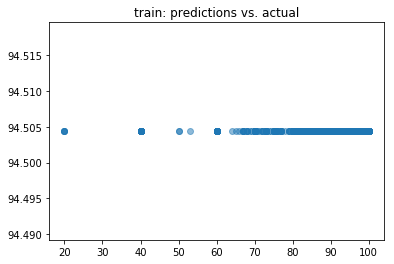

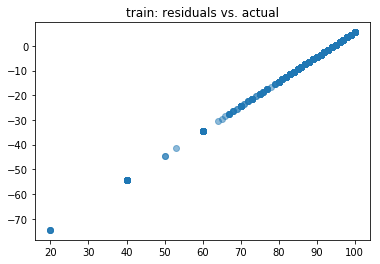

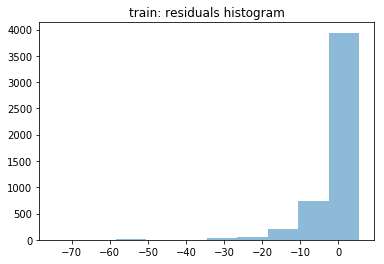

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 55.19598064, 'r2': 0.0}


###########################################
Running train model for 10000 samples
Results for Training
train Mean Squared Error: 54.0770
train R-Squared: 0.0000
(10000, 1)
(10000,)


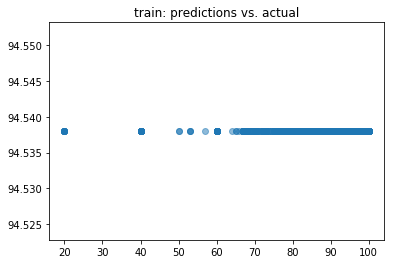

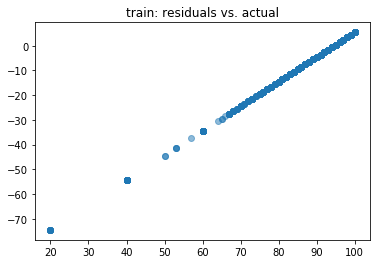

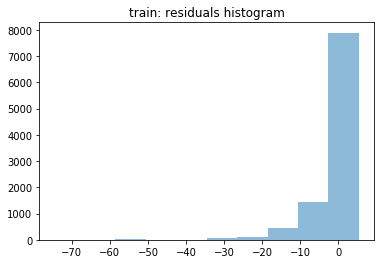

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 54.076956, 'r2': 0.0}


###########################################
Running train model for 20000 samples
Results for Training
train Mean Squared Error: 53.4556
train R-Squared: 0.0000
(20000, 1)
(20000,)


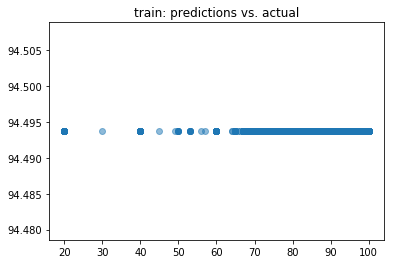

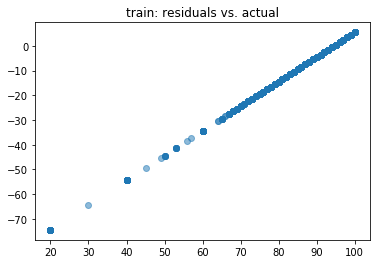

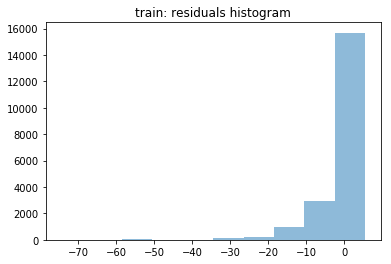

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.4555609375, 'r2': 0.0}


###########################################
Running train model for 50000 samples
Results for Training
train Mean Squared Error: 53.6494
train R-Squared: 0.0000
(50000, 1)
(50000,)


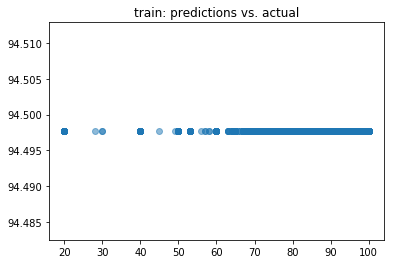

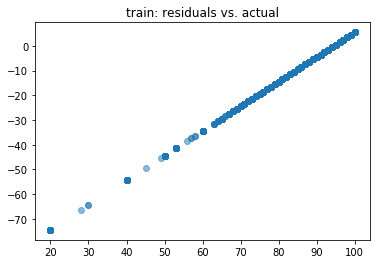

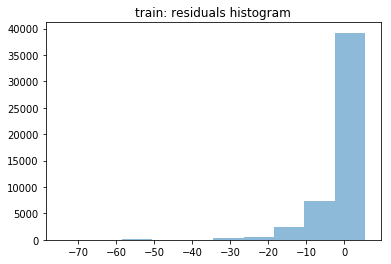

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'mse': 53.64943471, 'r2': 0.0}


In [112]:
for m, r in run_model_resgen(comb_train, y_train, regr, 'train', sample_sizes):
    print m
    print r